In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
# Load the dataset (replace 'your_dataset.csv' with the actual filename)
data = pd.read_csv('C:/Users/sadaf/Downloads/archive/segmentation data.csv')

# Select relevant features for clustering (e.g., 'Age' and 'Income')
X = data[['Age', 'Income']]

# Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\sadaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sadaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sadaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sadaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\sadaf\anaconda3\lib\site-packages\sklearn\clust

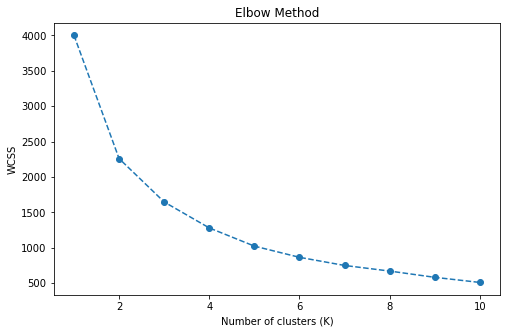

In [3]:
# Calculate WCSS (Within-Cluster-Sum-of-Squares) for different values of K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [4]:
optimal_k = 3  # Replace with your determined K value
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_scaled)
data['cluster'] = kmeans.labels_


C:\Users\sadaf\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


               Age         Income
cluster                          
0        53.282759  131152.439080
1        29.708539  101742.805419
2        35.893372  175604.582133


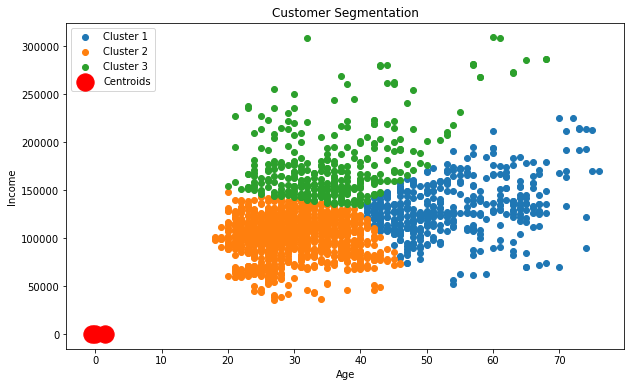

In [5]:
cluster_stats = data.groupby('cluster')[['Age', 'Income']].mean()
print(cluster_stats)

# Visualize the segments
plt.figure(figsize=(10, 6))
for cluster_label in range(optimal_k):
    plt.scatter(data[data['cluster'] == cluster_label]['Age'], data[data['cluster'] == cluster_label]['Income'], label=f'Cluster {cluster_label + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


               Age         Income
cluster                          
0        53.282759  131152.439080
1        29.708539  101742.805419
2        35.893372  175604.582133


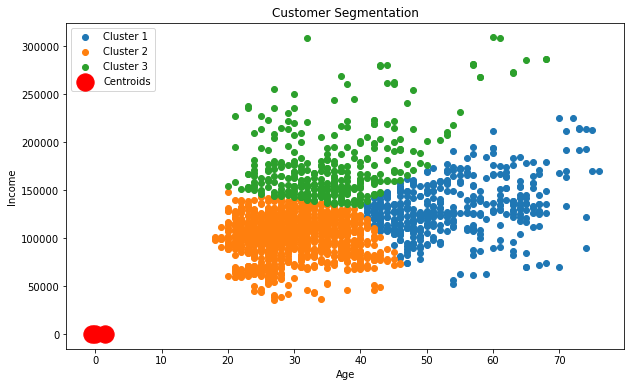

Segment 1:
Number of customers: 435
Average Age: 53.28
Average Income: 131152.44
Segment 2:
Number of customers: 1218
Average Age: 29.71
Average Income: 101742.81
Segment 3:
Number of customers: 347
Average Age: 35.89
Average Income: 175604.58


In [6]:
# Calculate cluster statistics (e.g., mean values of 'Age' and 'Income' for each cluster)
cluster_stats = data.groupby('cluster')[['Age', 'Income']].mean()
print(cluster_stats)

# Visualize the segments
plt.figure(figsize=(10, 6))
for cluster_label in range(optimal_k):
    plt.scatter(data[data['cluster'] == cluster_label]['Age'], data[data['cluster'] == cluster_label]['Income'], label=f'Cluster {cluster_label + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Customer Segmentation')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

# Interpret the segments and take actions
for cluster_label in range(optimal_k):
    cluster_data = data[data['cluster'] == cluster_label]
    print(f"Segment {cluster_label + 1}:")
    print(f"Number of customers: {len(cluster_data)}")
    print(f"Average Age: {cluster_stats.loc[cluster_label, 'Age']:.2f}")
    print(f"Average Income: {cluster_stats.loc[cluster_label, 'Income']:.2f}")
    
    # Add more interpretations or actions based on your business goals
